In [1]:
import pandas as pd
import numpy as n

In [2]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')
#for i in df:
#    if i[0]=='\t':
#        i==i[1:]
#        df.rename(columns={i: i[1:]}, inplace=True)
df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
5,1,3,7,2023,Rans Nusantara FC,2,1,3,3,Persikabo 1973,1,1,0,0,Maguwoharjo,Sleman
6,1,3,7,2023,Persik Kediri,1,1,1,1,Borneo FC Samarinda,1,1,1,1,Brawijaya,Kediri
7,1,3,7,2023,PSIS Semarang,3,1,3,3,Bhayangkara FC,1,1,0,0,Jatidiri,Semarang
8,1,3,7,2023,Persija Jakarta,1,1,1,1,PSM Makassar,1,1,1,1,Gelora Bung Karno,Jakarta Pusat
9,2,7,7,2023,PSS Sleman,2,1,1,4,Persis Solo,2,1,1,1,Maguwoharjo,Sleman


In [3]:
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

In [105]:
print(df['city'].values)

['Gianyar' 'Solo' 'Bandung' 'Tangerang' 'Martapura' 'Sleman' 'Kediri'
 'Semarang' 'Jakarta Pusat' 'Sleman' 'Gianyar' 'Surabaya' 'Pare-pare'
 'Tangerang' 'Samarinda' 'Pamekasan' 'Bekasi' 'Bogor' 'Bogor' 'Martapura'
 'Bandung' 'Sleman' 'Kediri' 'Solo' 'Gianyar' 'Semarang' 'Bekasi'
 'Samarinda' 'Sleman' 'Tangerang' 'Gianyar' 'Tangerang' 'Pare-pare'
 'Bekasi' 'Surabaya' 'Pamekasan']


### algorithm cekson

In [63]:
df.loc[df.home.str.contains('Kediri')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
6,1,3,7,2023,Persik Kediri,1,1,1,1,Borneo FC Samarinda,1,1,1,1,Brawijaya,Kediri
22,3,15,7,2023,Persik Kediri,5,2,3,4,Arema FC,2,2,0,1,Brawijaya,Kediri


In [65]:
# home or away at certain week
hora = df.loc[
   ( (df.home.str.contains('Bali')) | (df.away.str.contains('Bali')) ) & (df['week']==3)
]

hora

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [66]:
df.loc[df.home.str.contains('Bali') | df.away.str.contains('Bali')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
14,2,8,7,2023,Borneo FC Samarinda,3,1,3,4,Bali United FC,1,1,0,0,Segiri,Samarinda
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [67]:
hgf=df.loc[df.home.str.contains('Bali')]['hscore'].sum() #goal for
agf=df.loc[df.away.str.contains('Bali')]['ascore'].sum()
hga=df.loc[df.home.str.contains('Bali')]['ascore'].sum() #goal against
aga=df.loc[df.away.str.contains('Bali')]['hscore'].sum()
win=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 3)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 3))].shape[0]
draw=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 1)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 1))].shape[0]
lose=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 0)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 0))].shape[0]
print(hgf,agf,hga,aga,win,draw,lose)

2 1 2 3 1 0 2


In [228]:
if hora.home.str.contains('Bali').item():
    total_point=hora.htotal
else:
    total_point=hora.atotal
total_point

14    0
Name: atotal, dtype: int64

# klasemen pekan ke

In [3]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [7]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==5) ] # PEKAN KE
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])

    if hora.home.str.contains(cl).item():
        points.append(hora['htotal'].values[0])
        #win.append
    else:
        points.append(hora['atotal'].values[0])
points

[9, 5, 6, 10, 7, 8, 4, 8, 8, 6, 2, 5, 8, 10, 8, 10, 1, 5]

## head to head

In [5]:
df.groupby(["home","away"])

In [5]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
#dff = dff.unstack(fill_value=0)
#dff = pd.merge(dff, df[['home', 'away', 'hscore', 'ascore']], on=['home', 'away'])
dff

hscore  ascore  hpoint  apoint
home                away                                               
Arema FC            Bali United FC            1       3       0       3
                    Persib Bandung            3       3       1       1
Bali United FC      Dewa United FC            3       1       3       0
                    Madura United FC          2       1       3       0
                    PSS Sleman                0       1       0       3
Bhayangkara FC      PSM Makassar              0       0       1       1
                    Persikabo 1973            1       3       0       3
                    Rans Nusantara FC         1       2       0       3
Borneo FC Samarinda Bali United FC            3       1       3       0
                    PS Barito Putera          2       1       3       0
Dewa United FC      Arema FC                  1       0       3       0
                    Persik Kediri             3       0       3       0
Madura United FC    Persik Kediri             3       2       3       0
                    Persis Solo               4       3       3       0
PS Barito Putera    Madura United FC          1       2       0       3
                    PSS Sleman                3       1       3       0
                    Persita Tangerang         2       0       3       0
PSIS Semarang       Bhayangkara FC            3       1       3       0
                    Borneo FC Samarinda       0       0       1       1
                    Persebaya Surabaya        2       0       3       0
PSM Makassar        Dewa United FC            1       2       0       3
                    Persib Bandung            4       2       3       0
PSS Sleman          PSIS Semarang             2       2       1       1
                    Persis Solo               2       2       1       1
Persebaya Surabaya  PS Barito Putera          1       1       1       1
                    Rans Nusantara FC         2       2       1       1
Persib Bandung      Dewa United FC            2       2       1       1
                    Madura United FC          1       1       1       1
Persija Jakarta     Bhayangkara FC            4       1       3       0
                    PSM Makassar              1       1       1       1
                    Persebaya Surabaya        1       0       3       0
Persik Kediri       Arema FC                  5       2       3       0
                    Borneo FC Samarinda       1       1       1       1
                    Persib Bandung            1       2       0       3
Persikabo 1973      PSM Makassar              0       1       0       3
                    Persija Jakarta           0       0       1       1
                    Persita Tangerang         2       2       1       1
Persis Solo         Arema FC                  1       1       1       1
                    Borneo FC Samarinda       2       1       3       0
                    Persebaya Surabaya        2       3       0       3
Persita Tangerang   PSIS Semarang             2       0       3       0
                    Persija Jakarta           1       0       3       0
Rans Nusantara FC   PSS Sleman                0       0       1       1
                    Persikabo 1973            2       1       3       0
                    Persita Tangerang         0       1       0       3

### cekson refer elemen multi-level datafrem

In [32]:
dff.loc[['Persis Solo']]

hscore  ascore  hpoint  apoint
home        away                                               
Persis Solo Borneo FC Samarinda       2       1       3       0
            Persebaya Surabaya        2       3       0       3

In [30]:
dff.loc[dff.index.get_level_values('home')==('PS Barito Putera')or
        dff.index.get_level_values('home')==('Borneo FC Samarinda')or
        dff.index.get_level_values('home')==('PSIS Semarang')or
        dff.index.get_level_values('home')==('PSM Makassar')or
        dff.index.get_level_values('home')==('Madura United FC')or
        dff.index.get_level_values('home')==('Rans Nusantara FC')]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
dff.loc[dff.index.get_level_values('away')=='Persis Solo'] #iloc juga bisa

,,hscore,ascore,hpoint,apoint
home,away,,,,
Madura United FC,Persis Solo,4,3,3,0
PSS Sleman,Persis Solo,2,2,1,1


In [42]:
#dff.loc[['Persis Solo']]
#dff.loc[dff.index.get_level_values('away')=='Persis Solo'] #iloc juga bisa
dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]]
dff.loc[ ((h1&a2) | (h2&a1))

,,hscore,ascore,hpoint,apoint
home,away,,,,
PSS Sleman,Persis Solo,2,2,1,1
Persis Solo,Borneo FC Samarinda,2,1,3,0


In [43]:
len(dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]])

2

In [183]:
print(
    dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint'],
    dff.loc[('PSS Sleman','Persis Solo')]['hpoint']
)

3 1


### who's upper?

In [185]:
#GIMANA INI?

max(
    (dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint']),
    (dff.loc[('PSS Sleman','Persis Solo')]['hpoint'])
)

3

In [328]:
def h2h(club,st):
    eq=df.loc[
        ( (df['home']==club[st]) & (df['away']==club[st+1]) )|
        ( (df['away']==club[st]) & (df['home']==club[st+1]) ),
        ['home','away','hpoint']
    ].reset_index(drop=True)
    
    if len(eq)<=1:
        eq.loc[1]=n.nan
        if len(eq)<=1:
            eq.loc[0]=n.nan
    
    if pd.isnan(eq.home[0]):
        ret=club[st]
    else:
        ret=eq.sort_values(by='hpoint')['home'].reset_index(drop=True)[0]
    
    return(ret)

## klasemen

In [8]:
tables = pd.DataFrame ({"Clubs": club, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
#tables["GD"]=tables['GF']-tables['GA']
tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Won,Drawn,Lost,GF,GA,GD,Points
1,Dewa United FC,3,1,1,9,6,3,10
2,Madura United FC,3,1,1,11,9,2,10
3,Persita Tangerang,3,1,1,6,4,2,10
4,Bali United FC,3,0,2,9,7,2,9
5,Persija Jakarta,2,2,1,6,3,3,8
6,Borneo FC Samarinda,2,2,1,7,5,2,8
7,PSIS Semarang,2,2,1,7,5,2,8
8,PSM Makassar,2,2,1,7,5,2,8
9,Rans Nusantara FC,2,2,1,6,5,1,8
10,PS Barito Putera,2,1,2,8,6,2,7


### coba sort h2h bikinan gua

In [46]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

,Clubs,Points,pr
1,Dewa United FC,10,18
2,Persita Tangerang,9,17
3,PS Barito Putera,7,16
4,Borneo FC Samarinda,7,15
5,PSIS Semarang,7,14
6,PSM Makassar,7,13
7,Madura United FC,7,12
8,Rans Nusantara FC,7,11
9,Bali United FC,6,10
10,Persija Jakarta,5,9


In [9]:
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):#(len(sh)):
    print (i)
    try:
        sh['Points'][i]==sh['Points'][i+1]
        #print(sh['Clubs'][i], sh['Clubs'][i+1])
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            #print('game masuk try lv 1')
            
            if len(game)==1:
                #print('game 1')
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']
                    #print('try lv 2')
                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
                    #print('exc lv 2')
                
                #if i1scr < i2scr: EMANG KOMEN
                    #sh['pr'][i]=sh['pr'][i]-1 EMANG KOMEN
                    #sh['pr'][i+1]=sh['pr'][i+1]+1 EMANG KOMEN
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                #print('game = 2')
                
            if i1scr < i2scr:
                #print('i1scr < i2scr')
                sh.at[i,'pr']=sh['pr'][i]-1
                sh.at[i+1,'pr']=sh['pr'][i+1]+1
        
    except:
        print('gabisa')
        
sh

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
gabisa


,Clubs,Points,pr
1,Dewa United FC,10,18
2,Persita Tangerang,9,17
3,PS Barito Putera,7,15
4,Borneo FC Samarinda,7,16
5,PSIS Semarang,7,14
6,PSM Makassar,7,13
7,Madura United FC,7,12
8,Rans Nusantara FC,7,11
9,Bali United FC,6,10
10,Persija Jakarta,5,9


In [10]:
sh.sort_values(by='pr', ascending=False).reset_index(drop=True)

,Clubs,Points,pr
0,Dewa United FC,10,18
1,Persita Tangerang,9,17
2,Borneo FC Samarinda,7,16
3,PS Barito Putera,7,15
4,PSIS Semarang,7,14
5,PSM Makassar,7,13
6,Madura United FC,7,12
7,Rans Nusantara FC,7,11
8,Bali United FC,6,10
9,Persija Jakarta,5,9


### bikinan chat gpt gblk

In [11]:
tablesai=pd.DataFrame ({"Clubs": club, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
tablesai.insert(len(tablesai.columns)-1, "GD", (tablesai['GF']-tablesai['GA']))

tablesai=tablesai.sort_values(by=['Points'], ascending=False).reset_index(drop=True)
tablesai.index=tablesai.index + 1
tablesai

,Clubs,Won,Drawn,Lost,GF,GA,GD,Points
1,Dewa United FC,3,1,0,8,3,5,7
2,PS Barito Putera,2,1,1,7,4,3,7
3,Persita Tangerang,2,0,1,3,2,1,6
4,Rans Nusantara FC,2,0,1,4,3,1,6
5,PSIS Semarang,2,1,1,7,5,2,6
6,Persija Jakarta,1,2,0,5,2,3,5
7,PSS Sleman,1,2,1,6,7,-1,4
8,Madura United FC,1,1,1,5,5,0,4
9,Persik Kediri,1,1,2,8,9,-1,4
10,Persis Solo,1,1,1,6,6,0,4


In [19]:
def custom_sort(tablesai, dff, swap_rows):
    # Sort by "Points" in descending order
    tablesai.sort_values(by='Points', ascending=False, inplace=True)
    
    # Resolve ties using "Head to Head"
    for i in range(len(tablesai)):
        team = tablesai.iloc[i]['Clubs']
        matches = dff.loc[team]
        for _, match in matches.iterrows():
            if match['home'] == team:
                opp_team = match['away']
                opp_index = tablesai.index[tablesai['Clubs'] == opp_team].values[0]
                if tablesai.at[i, 'Points'] == tablesai.at[opp_index, 'Points']:
                    if match['hscore'] > match['ascore']:
                        tablesai = swap_rows(tablesai, i, opp_index)
    
    # Resolve ties using "Goals Difference" in descending order
    tablesai.sort_values(by='GD', ascending=False, inplace=True)
    
    # Resolve ties using "Goals Aggressiveness" in descending order
    tablesai.sort_values(by='GF', ascending=False, inplace=True)

    tablesai.reset_index(drop=True, inplace=True)
    return tablesai

def swap_rows(df, row1, row2):
    temp = df.iloc[row1].copy()
    df.iloc[row1] = df.iloc[row2]
    df.iloc[row2] = temp
    return df

custom_sort(tablesai, dff, swap_rows)

KeyError: 'home'

### algorithm cekson

In [331]:
dicoba=h2h(tables['Clubs'],1)
dicoba

AttributeError: module 'pandas' has no attribute 'isnan'

In [49]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][1]) & (df['away']==tables['Clubs'][1+1]) )|
    ( (df['away']==tables['Clubs'][1]) & (df['home']==tables['Clubs'][1+1]) ),
    ['home','away','hpoint']
].reset_index(drop=True)

#if len(eq)==0:
#    eq.loc[0]=n.nan
if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
    #eq=eq.sort_index()
    
if n.isnan(eq.home[0]):
    #print ('y')
    ret=tables['Clubs'][1]
else:
    ret=eq.sort_values(by='hpoint')['home'].reset_index(drop=True)[0]
    
#max(eq['hpoint'][0],eq['hpoint'][1])

#eq.sort_values(by='hpoint')['home'][0]
#len(eq)
print(eq)
print(ret)
print(f'eq[home][0] = {eq.home[0]}')
tables['Clubs'][1]

  home away  hpoint
1  NaN  NaN     NaN
0  NaN  NaN     NaN
Dewa United FC
eq[home][0] = nan


'Dewa United FC'

In [50]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][3]) & (df['away']==tables['Clubs'][3+1]) )|
    ( (df['away']==tables['Clubs'][3]) & (df['home']==tables['Clubs'][3+1]) ),
    ['home','away','hpoint','apoint']
].reset_index(drop=True)

if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
eq=eq.sort_index()
eq

,home,away,hpoint,apoint
0,Borneo FC Samarinda,PS Barito Putera,3.0,0.0
1,NaN,NaN,NaN,NaN


# hitung home away poin dari mana

#### hitung poin home/away klub peringkat 1 yang diperoleh dari peringkat 14-18

In [298]:
df.loc[(df['home']==tables['Clubs'][1]) & (df['away'].isin(tables['Clubs'].iloc[13:18])), ['home', 'hpoint']]

,home,hpoint
3,Dewa United FC,3


In [289]:
df.loc[df['away'].isin(tables['Clubs'].iloc[0:3])]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
12,2,8,7,2023,PSM Makassar,1,1,0,1,Dewa United FC,2,1,3,6,Gelora B. J. Habibie,Pare-pare
16,2,9,7,2023,Bhayangkara FC,1,1,0,0,Rans Nusantara FC,2,1,3,6,Patriot Chandra Bhaga,Bekasi


In [299]:
df.loc[(df['away']==tables['Clubs'][1]) & (df['home'].isin(tables['Clubs'].iloc[13:18])), ['away', 'apoint']]

,away,apoint


In [297]:
#ok

# points earned at

In [7]:
pea = pd.DataFrame({
    'Club': ['Arema FC', 'Bali United FC', 'Bhayangkara FC', 'Borneo FC Samarinda', 'Dewa United FC', 'Madura United FC', 'PS Barito Putera', 'PSIS Semarang', 'PSM Makassar', 'PSS Sleman', 'Persebaya Surabaya', 'Persib Bandung', 'Persija Jakarta', 'Persik Kediri', 'Persikabo 1973', 'Persis Solo', 'Persita Tangerang', 'Rans Nusantara FC'],
    'Home Points': [0, 3, 0, 6, 6, 6, 0, 6, 0, 2, 2, 2, 1, 4, 1, 3, 6, 3],
    'False Home Points': [1, 0, 0, 0, 0, 0, 6, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0],
    'Away Points': [0, 3, 0, 1, 4, 1, 1, 1, 4, 3, 3, 1, 1, 0, 3, 1, 3, 4],
    'Total Points': [1, 6, 0, 7, 10, 7, 7, 7, 7, 5, 5, 3, 5, 4, 4, 4, 9, 7],
    'th': [1, 3, 0, 6, 6, 6, 6, 6, 3, 2, 2, 2, 4, 4, 1, 3, 6, 3]
})
pea

,Club,Home Points,False Home Points,Away Points,Total Points,th
0,Arema FC,0,1,0,1,1
1,Bali United FC,3,0,3,6,3
2,Bhayangkara FC,0,0,0,0,0
3,Borneo FC Samarinda,6,0,1,7,6
4,Dewa United FC,6,0,4,10,6
5,Madura United FC,6,0,1,7,6
6,PS Barito Putera,0,6,1,7,6
7,PSIS Semarang,6,0,1,7,6
8,PSM Makassar,0,3,4,7,3
9,PSS Sleman,2,0,3,5,2


In [8]:
# Merge "sh," "tables," and "hbdf" dataframes on the "Clubs" column and sort based on "sh" order
hbdf = tables.merge(pea, left_on="Clubs", right_on="Club")#.sort_values(by="pr", ascending=False)
# Print the sorted merged dataframe
hbdf

,Clubs,Won,Drawn,Lost,GF,GA,GD,Points,Club,Home Points,False Home Points,Away Points,Total Points,th
0,Dewa United FC,3,1,0,8,3,5,10,Dewa United FC,6,0,4,10,6
1,Persita Tangerang,3,0,1,4,2,2,9,Persita Tangerang,6,0,3,9,6
2,PS Barito Putera,2,1,1,7,4,3,7,PS Barito Putera,0,6,1,7,6
3,Borneo FC Samarinda,2,1,1,7,5,2,7,Borneo FC Samarinda,6,0,1,7,6
4,PSIS Semarang,2,1,1,7,5,2,7,PSIS Semarang,6,0,1,7,6
5,PSM Makassar,2,1,1,7,5,2,7,PSM Makassar,0,3,4,7,3
6,Madura United FC,2,1,1,9,8,1,7,Madura United FC,6,0,1,7,6
7,Rans Nusantara FC,2,1,1,6,5,1,7,Rans Nusantara FC,3,0,4,7,3
8,Bali United FC,2,0,2,6,6,0,6,Bali United FC,3,0,3,6,3
9,Persija Jakarta,1,2,1,5,3,2,5,Persija Jakarta,1,3,1,5,4


In [9]:
hbdf[['Clubs','Home Points', 'False Home Points', 'Away Points', 'Total Points', 'th']]

,Clubs,Home Points,False Home Points,Away Points,Total Points,th
0,Dewa United FC,6,0,4,10,6
1,Persita Tangerang,6,0,3,9,6
2,PS Barito Putera,0,6,1,7,6
3,Borneo FC Samarinda,6,0,1,7,6
4,PSIS Semarang,6,0,1,7,6
5,PSM Makassar,0,3,4,7,3
6,Madura United FC,6,0,1,7,6
7,Rans Nusantara FC,3,0,4,7,3
8,Bali United FC,3,0,3,6,3
9,Persija Jakarta,1,3,1,5,4


## plot(s)

In [10]:
import matplotlib.pyplot as p

Text(-1.97, 19.2, 'source: Liga Indonesia Baru')

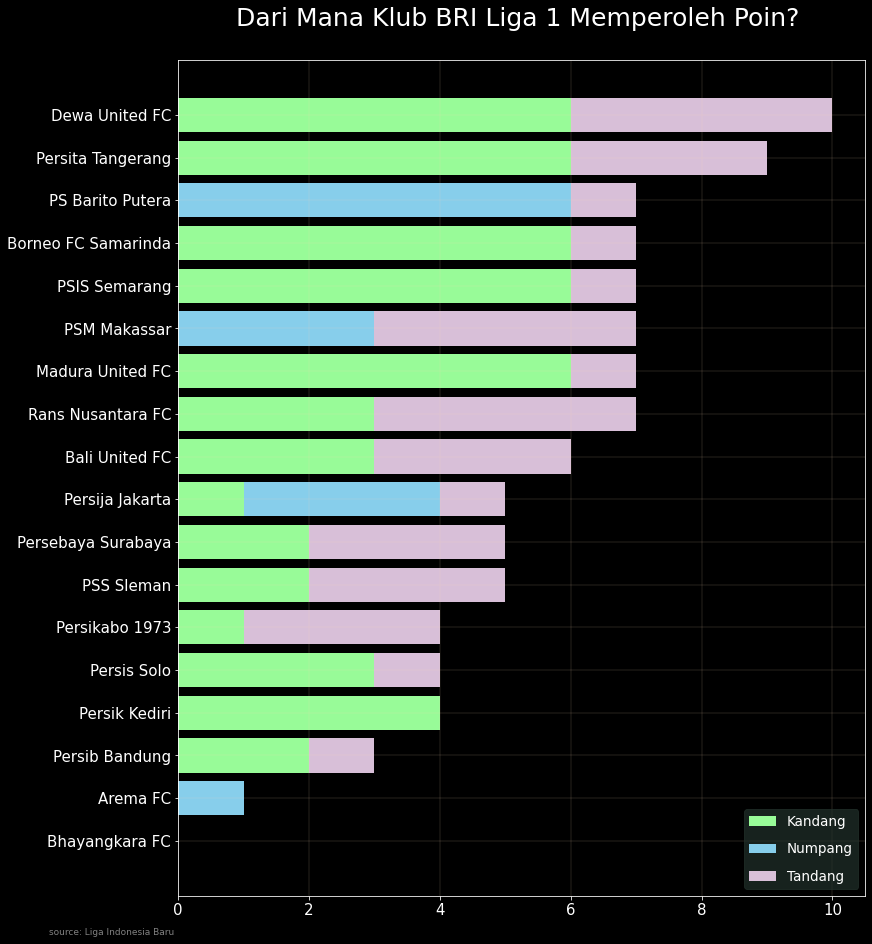

In [48]:
f1=p.figure(num=1, figsize=(12,13), facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, alpha=.4, color='peachpuff')
p.barh(hbdf.Clubs, hbdf['Home Points'], color='palegreen', label='Kandang')
p.barh(hbdf.Clubs, hbdf['False Home Points'], left=hbdf['Home Points'], color='skyblue', label='Numpang')
p.barh(hbdf.Clubs, hbdf['Away Points'], left=hbdf['Home Points']+hbdf['False Home Points'], color='thistle', label='Tandang')
p.tick_params(colors='white')
p.legend(loc='lower right', facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Dari Mana Klub BRI Liga 1 Memperoleh Poin? \n", size=25, color='white')
p.text(s="source: Liga Indonesia Baru", x=-1.97, y=19.2, fontsize=9, color='grey')
#p.gca().get_yticklabels()

In [58]:
hbdf.index

Int64Index([0, 1, 3, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

[]

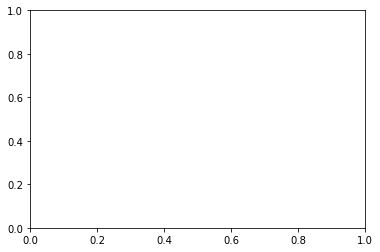